Version 2025.1

# LyαForest - 2nd Afternoon

In this notebook no error propagation is needed!

In [1]:
import matplotlib.pyplot as plt
import numpy as np


## Task -2: Absorption Line Profiles
<div class="alert alert-block alert-warning">
<b>Info:</b> Discuss with your supervisor!
</div>

![](voigt_profile.png)
### Lorentzian profile:
- Natural broadening -> result of finite radiative lifetime
- Collisional/pressure broadeing -> finite lifetime in quantum state owing to collisions
### Gaussian profile:
- Doppler broadening -> thermal motion
## Voigt profile
-> Convolution of Lorentzian and Gaussian

![](Absorption_line_profiles.png)
- Effect of doppler broadening (plot 2):
Absorption at moderate density $10^{14} \ cm^{-2}$ with increasing doppler broadening parameter b= 20-40 km/s (from a narrow Gaussian profile to a broad one)
- Effect of line depth (plot 1): For the broad doppler parameter b= 30 km/s the column density is increased until saturation
- Lorentzian Damping Wings: For very high densities the Voigt profile gets very broad, saturate with with damping wings

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> In your report, describe briefly the effect of density and temperature on the absorption lines. Which effect is causing the absorption lines? What does Saturation mean in terms of opticall thickness and flux?
</div>

## Task -1: Fit the Lyman Alpha Forest Data

In [7]:
#Finish

## Task 0: Load the fitted data from MIDAS software

In [8]:
# Load the columns from the file into arrays for the wavelength, column density and Doppler broadening: λ, NH, b
# In which units and scales (lin/log10) are the data represented?

In [9]:
# use np.genfromtxt(...) to load into a numpy matrix
# slice the matrix into arrays for λ, NH, b
# code:


In [10]:
data = np.genfromtxt('fit.dat', dtype = 'float', skip_header=1)

In [11]:
lam = data[:, 0]  # λ in Ångström
log_N = data[:, 2]  # log10(N_HI) in cm^-2
b = data[:, 4]  # b in km/s

In [12]:
N = 10**log_N

## Task 1: First look into the data

''

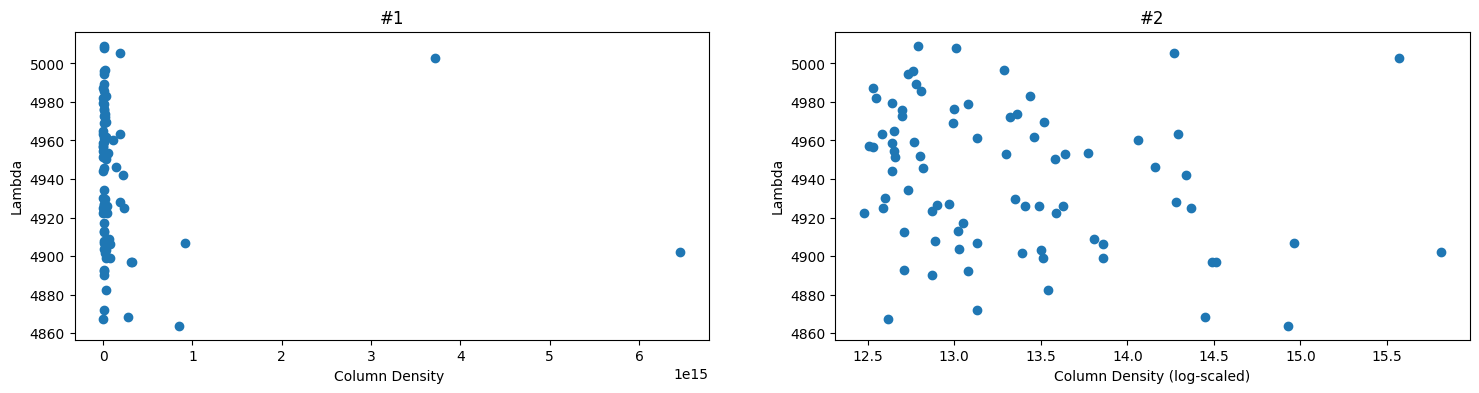

In [13]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.xlabel("Column Density ")
plt.ylabel("Lambda")
plt.title("#1")
plt.scatter(N,lam)
    # Illustrating the need for log10 scale 
    # scatter-plot
    # x-axis = column-density (data in linear scale)
    # y-axis = wavelength (data linear scale)

plt.subplot(1,2,2)
plt.scatter(log_N, lam)
plt.xlabel("Column Density (log-scaled)")
plt.ylabel("Lambda")
plt.title("#2")
    # To recognize the density distribution and the wavelength-range (compare with Figure 4 in the manual) 
    # of the data 
    # scatter-plot
    # x-axis = column-denisty (data in log10 scale)
    # y-axis = wavelength (data linear scale)

;


In [14]:
# Calculate the redshift range and the min/max of the column-densities of the loaded data: Δz, NH_min, NH_max
# What is the total number of the data points?

z = lam / 1215.67 - 1 # redshift

delta_z = np.max(z) - np.min(z)
NH_min = np.min(N)
NH_max = np.max(N)
num_points = len(lam)

print(f"Δz = {delta_z:.3f}")
print(f"N_H,min = {NH_min:.2e} cm^-2")
print(f"N_H,max = {NH_max:.2e} cm^-2")
print(f"Total data points = {num_points}")

Δz = 0.119
N_H,min = 3.02e+12 cm^-2
N_H,max = 6.46e+15 cm^-2
Total data points = 80


In [15]:
logN_min = np.log10(NH_min)
logN_max = np.log10(NH_max)
logN_min,logN_max

(np.float64(12.48), np.float64(15.81))

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> Which trend do you recognize for the density distribution?
</div>

In [16]:
# For lower column density we observe more clouds, but for higher column density we observe less.

<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>

## Task 2: Explore the distribution of the data with histograms
### 2.1 Equal bin-size
Ask yourself:
- Which histograms represent the distribution best?
- Are there empty bins? Use the return of the hist-function and check for zero counts. Avoid empty bins for the best histogram.
- What is even not good in Example 4?

Note:
- Do not use any normalization (for now)!
- **No** need for transparency mode (**alpha**) in this examples


Use functions: 
- **np.arange** for the data range and binsizes (examples 2-4); take care of the correct start/end values (print)
- Use **?plt.hist** in a cell to get help

Example 2 bins1: [12 13 14 15 16]
Example 2 bins2: [12.  12.5 13.  13.5 14.  14.5 15.  15.5 16. ]
Example 3 bins1: [12.48 13.48 14.48 15.48 16.48]
Example 3 bins2: [12.48 12.98 13.48 13.98 14.48 14.98 15.48 15.98]
Example 4 bins1: [12.305 13.305 14.305 15.305 16.305]
Example 4 bins2: [12.305 12.805 13.305 13.805 14.305 14.805 15.305 15.805]


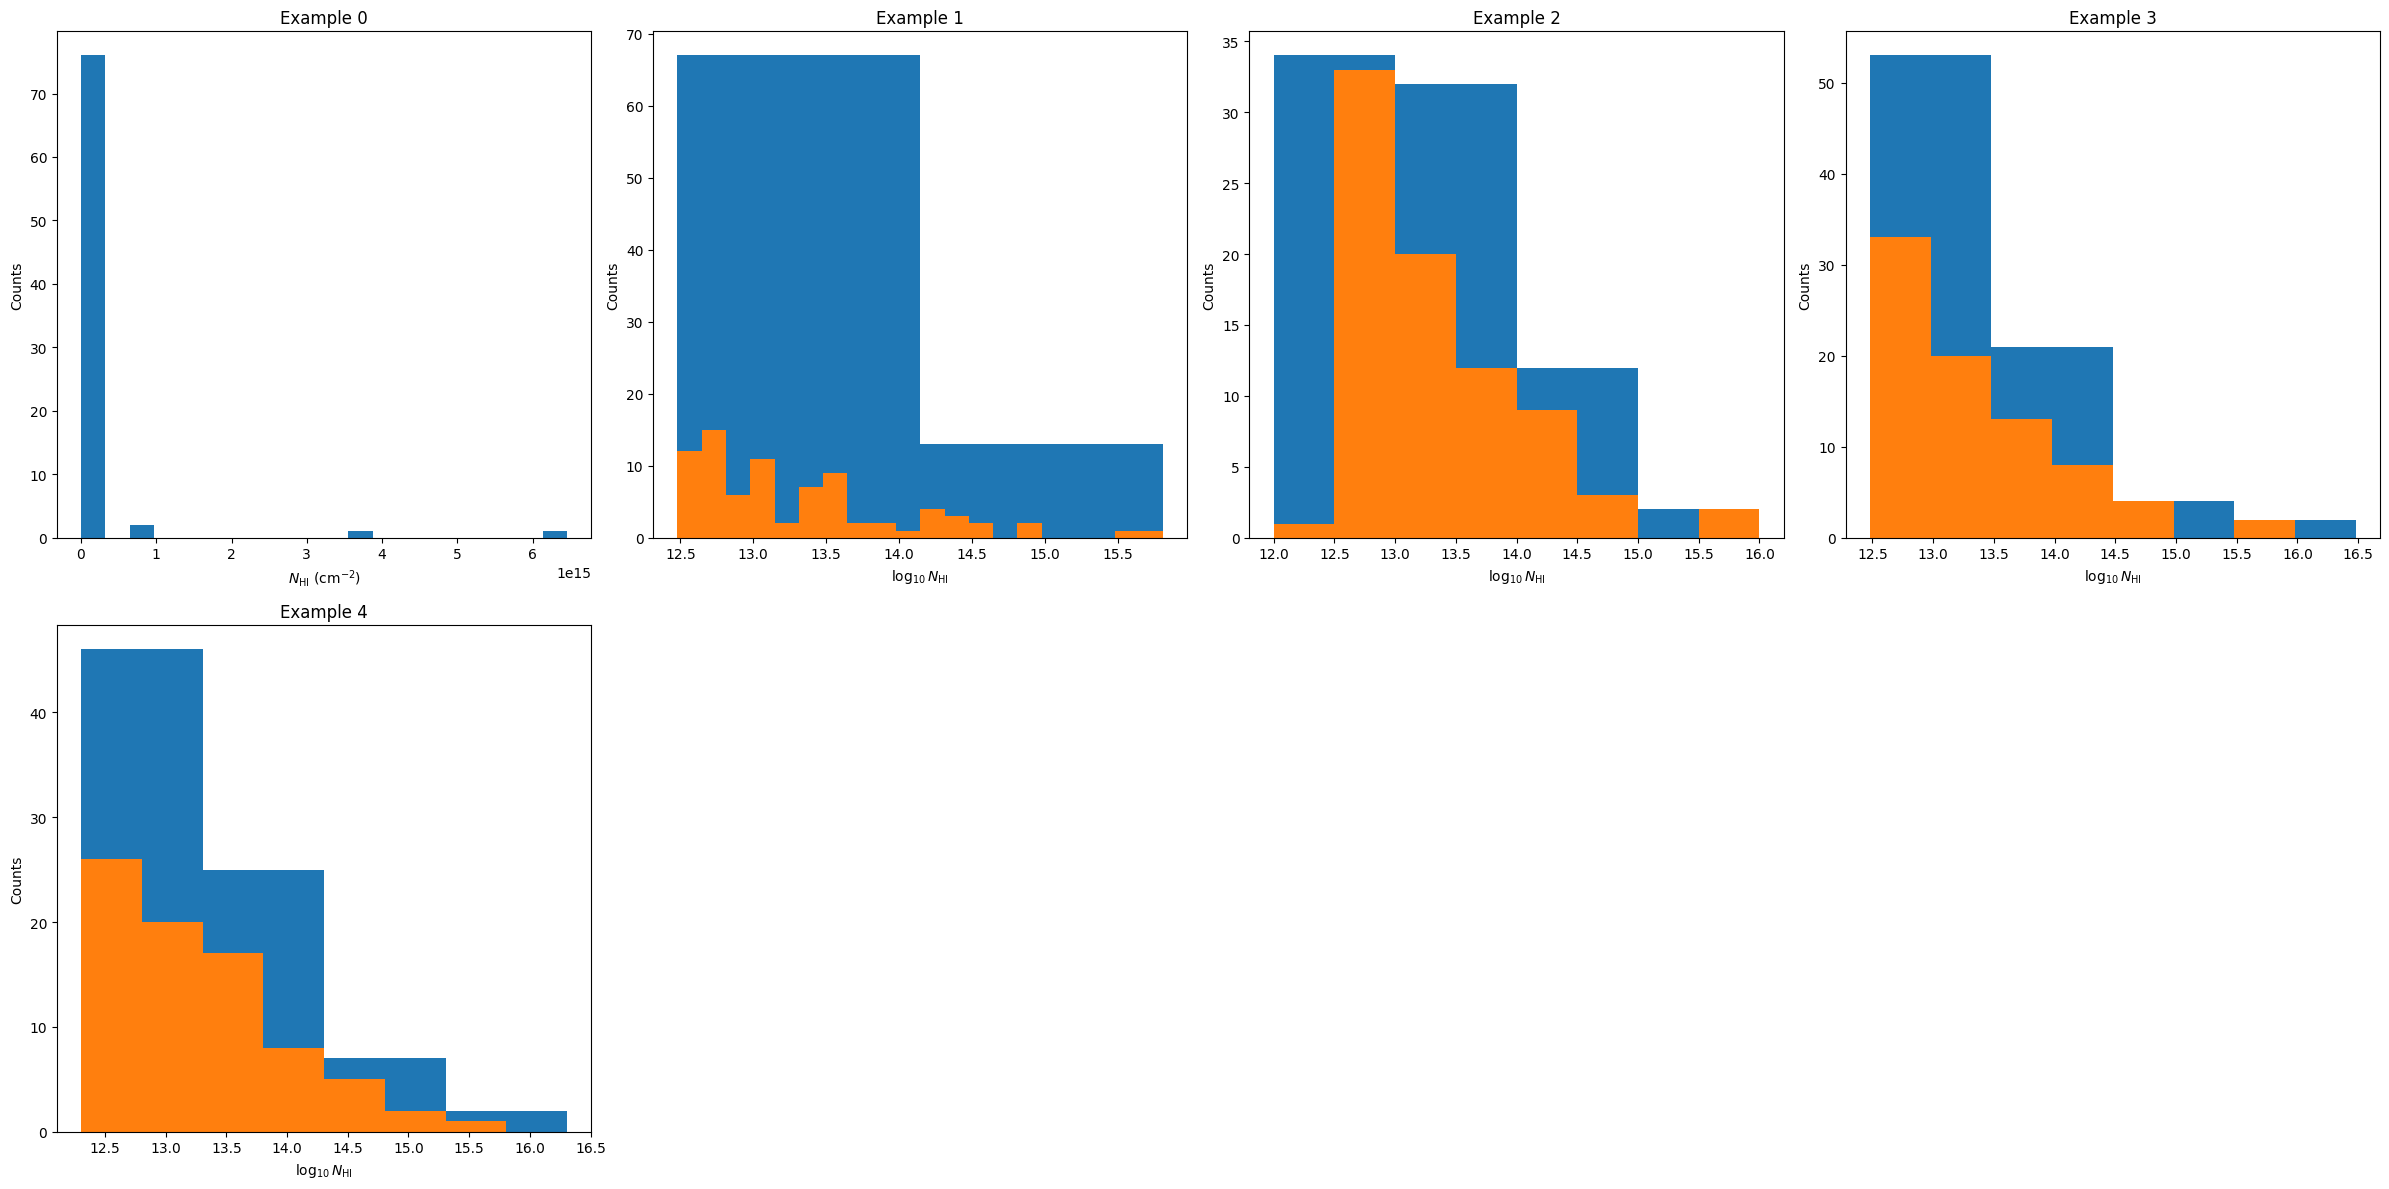

''

In [17]:
plt.figure(figsize=(24,12))

# Example 0
plt.subplot(2,4,1)
plt.hist(N, bins=20)
plt.xlabel(r"$N_{\mathrm{HI}}$ (cm$^{-2}$)")
plt.ylabel("Counts")
plt.title("Example 0")
    # plot one histogram-example for the column-density in linear-scale (like plot 1 in Task 1)

# Example 1
plt.subplot(2,4,2)
plt.title("Example 1")
plt.hist(log_N, bins=2)
plt.hist(log_N, bins=20)
plt.xlabel(r"$\log_{10} N_{\mathrm{HI}}$")
plt.ylabel("Counts")
    # two histograms (in one plot) with the column-density in log10-scale (x-axis): 
    # 1. with bins=2 and 
    # 2. with bins=20
    
# Example 2: 
range2 = (12, 16)
bins1_2 = np.arange(12, 16 + 1, 1)
bins2_2 = np.arange(12, 16 + 0.5, 0.5)
print("Example 2 bins1:", bins1_2)
print("Example 2 bins2:", bins2_2)

plt.subplot(2, 4, 3)
plt.title("Example 2")
plt.hist(log_N, bins=bins1_2, range=range2)
plt.hist(log_N, bins=bins2_2, range=range2)
plt.xlabel(r"$\log_{10} N_{\mathrm{HI}}$")
plt.ylabel("Counts")
    # two histograms (in one plot) with the column-density in log10-scale (x-axis):
    # plot both histograms for the columnm-density range [10^12 : 10^16] cm^-2 
    # use e.g. np.arange (attention: start/end values)
    
    # 1. binize = 1 (is log10)
    # 2. binsize = 0.5 (is log10)
    
# Example 3
range3 = (logN_min, logN_max)
bins1_3 = np.arange(logN_min, logN_max + 1, 1) #binsize 1
bins2_3 = np.arange(logN_min, logN_max + 0.5, 0.5) #binsize 0.5
print("Example 3 bins1:", bins1_3)
print("Example 3 bins2:", bins2_3)

plt.subplot(2, 4, 4)
plt.title("Example 3")
plt.hist(log_N, bins=bins1_3, range=range3)
plt.hist(log_N, bins=bins2_3, range=range3)
plt.xlabel(r"$\log_{10} N_{\mathrm{HI}}$")
plt.ylabel("Counts")
    # two histograms (in one plot) with the column-density in log10-scale (x-axis): 
    # plot both histograms for the column-density range [NH_min : NH_max] (calculated above)

    # 1. binize = 1 (is log10)
    # 2. binsize = 0.5 (is log10)

# Example 4: 


log_N_no_max = log_N[log_N < logN_max]
new_max = np.max(log_N_no_max)
eps = 0.175 
range4 = (logN_min - eps, new_max - eps)

bins1_4 = np.arange(range4[0], range4[1] + 1, 1)
bins2_4 = np.arange(range4[0], range4[1] + 0.5, 0.5)
print("Example 4 bins1:", bins1_4)
print("Example 4 bins2:", bins2_4)

plt.subplot(2, 4, 5)
plt.title("Example 4")
plt.hist(log_N, bins=bins1_4, range=range4)
plt.hist(log_N, bins=bins2_4, range=range4)
plt.xlabel(r"$\log_{10} N_{\mathrm{HI}}$")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()


    # two histograms (in one plot) with the column-density in log10-scale (x-axis): 
    # "delete" the data point with highest density -> new NH_max
    # plot both histograms for the column-density range [NH_min+/-ϵ : NH_max+/-ϵ] (calculated above)
    # -> change the beginning of the range with ϵ until the distribution is well represented

    # 1. binize = 1 (is log10)
    # 2. binsize = 0.5 (is log10)
;


<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> What are the problems for some of the examples?
</div>

In [18]:
# For Eq.1 the blue one is too smooth, and the orange one is too noisy. 
# For Eq.2 the edge isn't precise enough, so some of the bins are empty or have low counts.
# For Eq.3 the edge is precise enough, but because column-density range is not in a good position, there are still some bins that don't have count.
# For Eq.4 we delete the maxium data point because it helps us to have a well represented distribution.

### 2.2 Equal bin-counts
(also known as equi-depth histogram)
- Ensure to use all 80 data points
- Divide the data into bins such that each bin contains the same number of data points
- Take notice of the different bin-sizes. This method avoids bins with low counts. 
- Do not use any normalization (for now)!

In [19]:
# code idea:

# prepare the density data (all 80 points in right order) -> sorting the data
# split it into equal-sized groups based on quantiles

num_bins = 

# Compute bin edges for equal-count bins using quantiles
quantiles = np.linspace( ) # create an array with entries between 0-1 with a total number of num_bins+1
bin_edges = np.quantile(data, quantiles)

# have a look into the bin_edges array

SyntaxError: invalid syntax (1785269338.py, line 6)

In [22]:
S_N = np.sort(log_N, axis=-1, kind=None, order=None)
S_N

array([12.48, 12.51, 12.53, 12.53, 12.55, 12.58, 12.59, 12.6 , 12.62,
       12.64, 12.64, 12.64, 12.65, 12.65, 12.66, 12.7 , 12.7 , 12.71,
       12.71, 12.73, 12.73, 12.76, 12.77, 12.78, 12.79, 12.8 , 12.81,
       12.82, 12.87, 12.87, 12.89, 12.9 , 12.97, 12.99, 13.  , 13.01,
       13.02, 13.03, 13.05, 13.08, 13.08, 13.13, 13.13, 13.13, 13.29,
       13.3 , 13.32, 13.35, 13.36, 13.39, 13.41, 13.44, 13.46, 13.49,
       13.5 , 13.51, 13.52, 13.54, 13.58, 13.59, 13.63, 13.64, 13.77,
       13.81, 13.86, 13.86, 14.06, 14.16, 14.27, 14.28, 14.29, 14.34,
       14.37, 14.45, 14.49, 14.51, 14.93, 14.96, 15.57, 15.81])

In [23]:
S_N_F= np.array([12.48, 12.51, 12.53, 12.531, 12.55, 12.58, 12.59, 12.6 , 12.62,
       12.64, 12.641, 12.642, 12.65, 12.651, 12.66, 12.7 , 12.71 , 12.72,
       12.73, 12.74, 12.75, 12.76, 12.77, 12.78, 12.79, 12.8 , 12.81,
       12.82, 12.87, 12.88, 12.89, 12.9 , 12.97, 12.99, 13.  , 13.01,
       13.02, 13.03, 13.05, 13.08, 13.09, 13.13, 13.131, 13.132, 13.29,
       13.3 , 13.32, 13.35, 13.36, 13.39, 13.41, 13.44, 13.46, 13.49,
       13.5 , 13.51, 13.52, 13.54, 13.58, 13.59, 13.63, 13.64, 13.77,
       13.81, 13.86, 13.861, 14.06, 14.16, 14.27, 14.28, 14.29, 14.34,
       14.37, 14.45, 14.49, 14.51, 14.93, 14.96, 15.57, 15.81])

Counts per bin: 4
Bin edges:      [12.48    12.54905 12.618   12.6488  12.708   12.7475  12.787   12.8525
 12.942   13.0155  13.085   13.2031  13.354   13.447   13.513   13.6
 13.82    14.1765  14.343   14.531   15.81   ]
Counts per bin: 8
Bin edges:      [12.48  12.618 12.708 12.787 12.942 13.085 13.354 13.513 13.82  14.343
 15.81 ]
Counts per bin: 16
Bin edges:      [12.48  12.708 12.942 13.354 13.82  15.81 ]


''

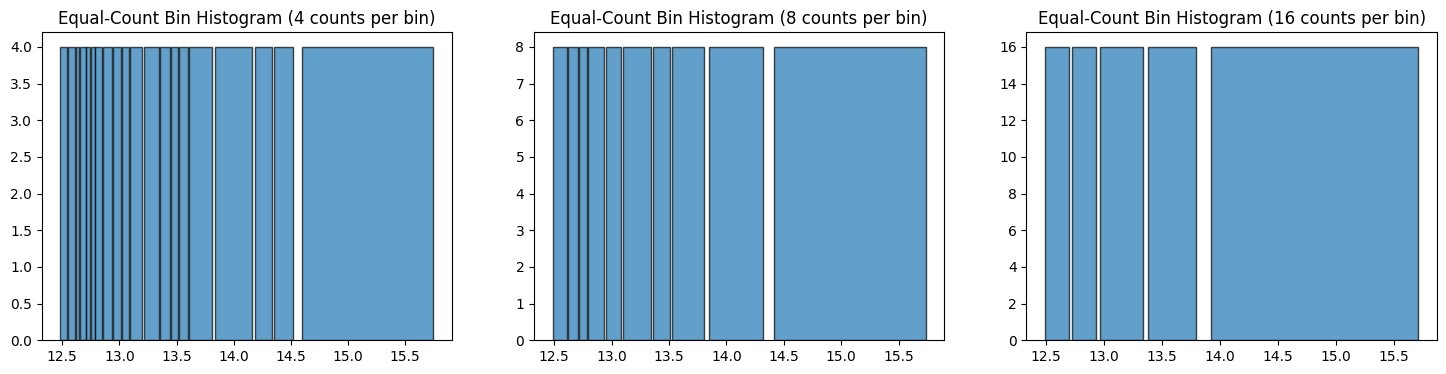

In [24]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title('Equal-Count Bin Histogram (4 counts per bin)')
num_bins = 20
quantiles = np.linspace(0, 1, num_bins+1) 
bin_edges_4 = np.quantile(S_N_F, quantiles)
print("Counts per bin:", 4)
print("Bin edges:     ", bin_edges_4)
    # plot a histogram with 4 counts per bin (for 80 data points)
plt.hist(S_N_F, bins=bin_edges_4, edgecolor='black', alpha=0.7, rwidth=0.9)

plt.subplot(1,3,2)
plt.title('Equal-Count Bin Histogram (8 counts per bin)')
num_bins = 10
quantiles = np.linspace(0, 1, num_bins+1) 
bin_edges_8 = np.quantile(S_N_F, quantiles)
print("Counts per bin:", 8)
print("Bin edges:     ", bin_edges_8)
    # plot a histogram with 8 counts per bin (for 80 data points)
plt.hist(S_N_F, bins=bin_edges_8, edgecolor='black', alpha=0.7, rwidth=0.9)

plt.subplot(1,3,3)
plt.title('Equal-Count Bin Histogram (16 counts per bin)')
num_bins = 5
quantiles = np.linspace(0, 1, num_bins+1) 
bin_edges_16 = np.quantile(S_N_F, quantiles)
print("Counts per bin:", 16)
print("Bin edges:     ", bin_edges_16)
    # plot a histogram with 16 counts per bin for 80 data points)
plt.hist(S_N_F, bins=bin_edges_16, edgecolor='black', alpha=0.7, rwidth=0.9)
;

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> What is particularly advantageous when examining the tail of the distribution compared to an equal bin histogram?
</div>

In [25]:
# This method avoids bins with low counts.
# The method with equal bin size is that the standard error heavily with number of elements in each bin (standard err = sigma/sqrt"N")
# Using equal elements in each bin methods makes the standard error constant in all bins, as all bins have same number of elements.
# We migh lose on resolution when using equal elements in each bin method, which makes in that case the previous method advantageous.

## Task 3: Normalize the histograms with their bin-width
- ... to represent the distribution function and make them comparable
- Use your best histograms from above: bin-size = 1, bin-size=0.5 and equal-count/bin = 10 or 16 .

In [26]:
# First: get the return values for the counts and the bin-edges from each histogram - not normalized
# -> check ?hist  to find out about the return values

# 1. Binsize = 1 (log10)
counts_1, edges_1, _ = plt.hist(log_N, bins=bins1_4, range=range4)
plt.clf()  # Clear the plot to avoid over-plotting

# 2. Binsize = 0.5 (log10)
counts_0_5, edges_0_5, _ = plt.hist(log_N, bins=bins2_4, range=range4)
plt.clf()  # Clear the plot to avoid over-plotting

# Print results
print("Histogram with Binsize=1:")
print("Counts:", counts_1)
print("Bin Edges:", edges_1)

print("\nHistogram with Binsize=0.5:")
print("Counts:", counts_0_5)
print("Bin Edges:", edges_0_5)

# 2. equal-count/bin = 8
BD8 = bin_edges_8
print("\nHistogram with equal-count/bin = 8:")
print("Counts:", 8)
print("Bin Edges:", BD8)


Histogram with Binsize=1:
Counts: [46. 25.  7.  2.]
Bin Edges: [12.305 13.305 14.305 15.305 16.305]

Histogram with Binsize=0.5:
Counts: [26. 20. 17.  8.  5.  2.  1.]
Bin Edges: [12.305 12.805 13.305 13.805 14.305 14.805 15.305 15.805]

Histogram with equal-count/bin = 8:
Counts: 8
Bin Edges: [12.48  12.618 12.708 12.787 12.942 13.085 13.354 13.513 13.82  14.343
 15.81 ]


<Figure size 640x480 with 0 Axes>

In [27]:
# Second:

# x-values: take the center of each bin (use the bin-edges and np.diff, note: delete the last bin of bin-edges)
# y-values: normalize each bin (counts) with their bin-width

# For Binsize = 1
x_values_1 = (edges_1[:-1] + edges_1[1:]) / 2  # Take the center of each bin
bin_widths_1 = 1             # Bin widths
y_values_1 = counts_1 / bin_widths_1          # Normalize counts by bin width

# For Binsize = 0.5
x_values_0_5 = (edges_0_5[:-1] + edges_0_5[1:]) / 2  # Take the center of each bin
bin_widths_0_5 = 0.5               # Bin widths
y_values_0_5 = counts_0_5 / bin_widths_0_5          # Normalize counts by bin width

# For Equal-count/bin = 8
bin_widths = np.diff(BD8)
bin_centers = BD8[:-1] + bin_widths/2
bin_counts = np.array([8,8,8,8,8,8,8,8,8,8])
d = 8 / bin_widths

# Print results
print("Binsize=1:")
print("X-values (bin centers):", x_values_1)
print("Y-values (normalized counts):", y_values_1)

print("\nBinsize=0.5:")
print("X-values (bin centers):", x_values_0_5)
print("Y-values (normalized counts):", y_values_0_5)

print("\nEqual-count/bin = 8:")
print("X-values (bin centers):", bin_centers)
print("Y-values (normalized counts):", d)


Binsize=1:
X-values (bin centers): [12.805 13.805 14.805 15.805]
Y-values (normalized counts): [46. 25.  7.  2.]

Binsize=0.5:
X-values (bin centers): [12.555 13.055 13.555 14.055 14.555 15.055 15.555]
Y-values (normalized counts): [52. 40. 34. 16. 10.  4.  2.]

Equal-count/bin = 8:
X-values (bin centers): [12.549  12.663  12.7475 12.8645 13.0135 13.2195 13.4335 13.6665 14.0815
 15.0765]
Y-values (normalized counts): [ 57.97101449  88.88888889 101.26582278  51.61290323  55.94405594
  29.73977695  50.31446541  26.05863192  15.29636711   5.45330607]


''

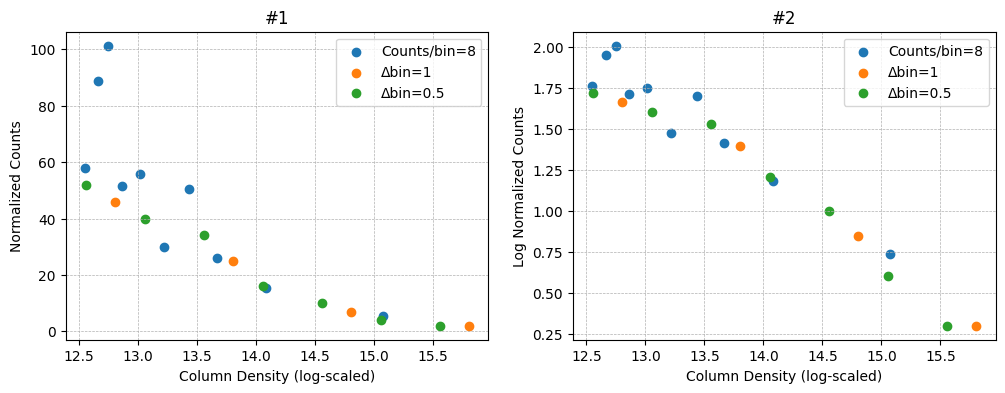

In [28]:
# Create two scatter plots:
# use the three normalized histograms with Δbin = 0.5 and Δbin = 1 and equi-depth histogram. (all three in each sub-plot)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(bin_centers, d, label="Counts/bin=8")
plt.scatter(x_values_1, y_values_1, label="Δbin=1")
plt.scatter(x_values_0_5, y_values_0_5, label="Δbin=0.5")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel("Column Density (log-scaled)")
plt.ylabel("Normalized Counts")
plt.title("#1")
     
    # x-axis: column-density in log10
    # y-axis: data linear

plt.subplot(1,2,2)
plt.scatter(bin_centers, np.log10(d), label="Counts/bin=8")
plt.scatter(x_values_1, np.log10(y_values_1), label="Δbin=1")
plt.scatter(x_values_0_5, np.log10(y_values_0_5), label="Δbin=0.5")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel("Column Density (log-scaled)")
plt.ylabel("Log Normalized Counts")
plt.title("#2")
    # x-axis: column-density in log10
    # y-axis: data in log10 (take the log10 of the data)
;

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> What does the distribution represent in log-log space?
</div>

In [29]:
# Linear relation between log_counts of the wavelength and log_column desity.

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> Which histogram represents the data best (skewed data)? How does the statistical error behave for both methods?
</div>

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> Why is it helpful to normalize the histogram?
</div>

In [31]:
# It's necessary to normalise the histogram because, if not normalised, one cannot see the linear relationship between logNcounts and LogCoulmnD, and 
# it helps us to make a comparation of eq-bincounts and eq-binsize.


<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>

## Task 4: Normalize the histograms according to the probability distribution function (pdf)
- ... as described in Equation 12:
- $f(N_{HI},z) = \frac{d^2 N}{d(ln N_{HI}) dz} = \frac{counts}{\Delta bin \ \Delta z }$
- Follow the steps for the normalization as before, change the log-base of $\Delta bin$ from log10 to log (=ln) and normalize by the redshft-range of the data.
- What is the effect of the term $\frac{1}{\Delta z}$ on the distribution? 

In [32]:
# Because it’s a constant factor across all bins, it doesn’t change the shape of the 
# f(NH) vs NH curve—only its overall amplitude is scaled by 1/Δz. That way one can directly compare forests covering 
# different redshift intervals on the same footing.

In [33]:
# Normalize the data
# Step 1: Δz
# Print Δz for verification
print(f"Redshift Range (Δz): {delta_z}")

# Step 2: Normalize the histograms
# For Δbin = 1
bin_width_ln_1 = np.log(10**1)  # ln(bin width)
pdf_1 = counts_1 / (bin_width_ln_1 * delta_z)  # Normalize counts

# For Δbin = 0.5
bin_width_ln_0_5 = np.log(10**0.5)  # ln(bin width)
pdf_0_5 = counts_0_5 / (bin_width_ln_0_5 * delta_z)  # Normalize counts

# For Equal-count/bin = 8
bin_width_ln_8 = np.log(10**bin_widths)
pdf_8 = bin_counts / (bin_width_ln_8 * delta_z)


Redshift Range (Δz): 0.11949789005239975


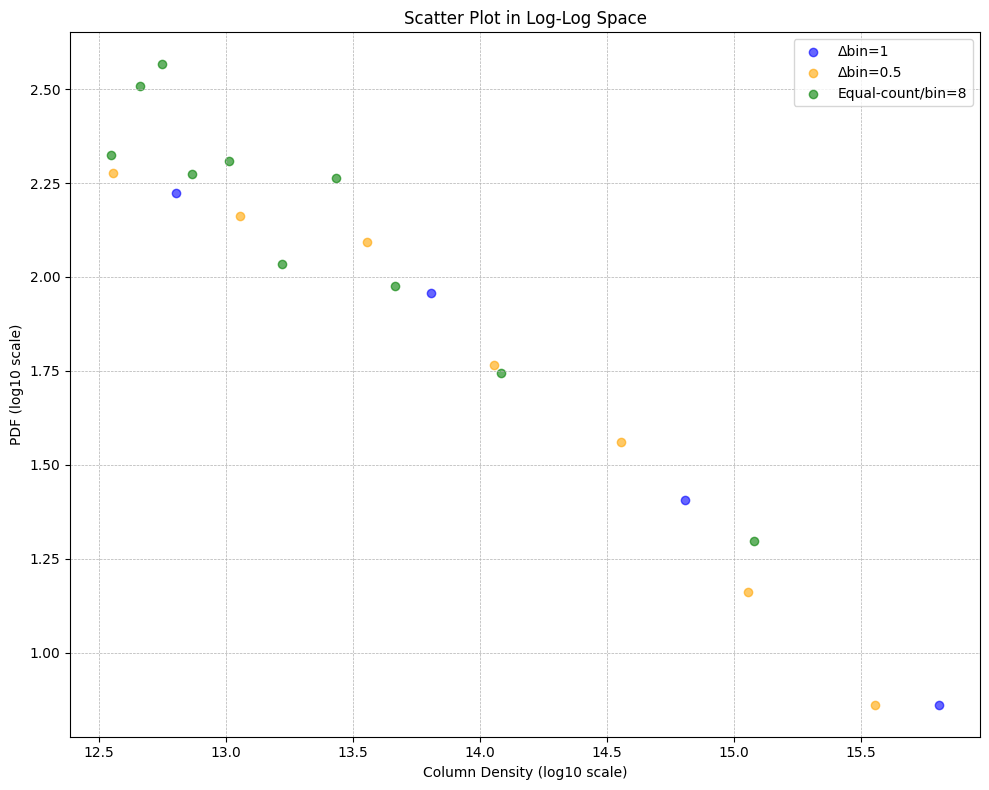

In [34]:
# Create a scatter plot in log-log space:
# (Use all histogram like before):

# x-axis: column-densit in log10
# y-axis: data in log10 (take the log10 of the data) 

valid_indices_1 = pdf_1 > 0  # Filter indices with positive PDF values for Δbin = 1
valid_indices_0_5 = pdf_0_5 > 0  # Filter indices with positive PDF values for Δbin = 0.5
valid_indices_8 = pdf_8 > 0  # Filter indices with positive PDF values for ΔEqual-count/bin = 8

log_x_values_1 = x_values_1[valid_indices_1]  # x-values for Δbin = 1
log_y_values_1 = np.log10(pdf_1[valid_indices_1])  # log10 of PDF for Δbin = 1

log_x_values_0_5 = x_values_0_5[valid_indices_0_5]  # x-values for Δbin = 0.5
log_y_values_0_5 = np.log10(pdf_0_5[valid_indices_0_5])  # log10 of PDF for Δbin = 0.5

log_x_values_8 = bin_centers[valid_indices_8]  # x-values for ΔEqual-count/bin = 8
log_y_values_8 = np.log10(pdf_8[valid_indices_8])  # log10 of PDF for Equal-count/bin = 8

plt.figure(figsize=(10, 8))
plt.title("Scatter Plot in Log-Log Space")

# Scatter plot for Δbin = 1
plt.scatter(log_x_values_1, log_y_values_1, color='blue', label="Δbin=1", alpha=0.6)

# Scatter plot for Δbin = 0.5
plt.scatter(log_x_values_0_5, log_y_values_0_5, color='orange', label="Δbin=0.5", alpha=0.6)

# Scatter plot for ΔEqual-count/bin = 8
plt.scatter(log_x_values_8, log_y_values_8, color='green', label="Equal-count/bin=8", alpha=0.6)

# Set axis labels
plt.xlabel("Column Density (log10 scale)")
plt.ylabel("PDF (log10 scale)")

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>

## Task 5: Fit the power-law distribution
- Many observations found that the column-density distributions follow a power-law $f(N) = A N^{\beta}$ (Equation 15) similar to our measurements.

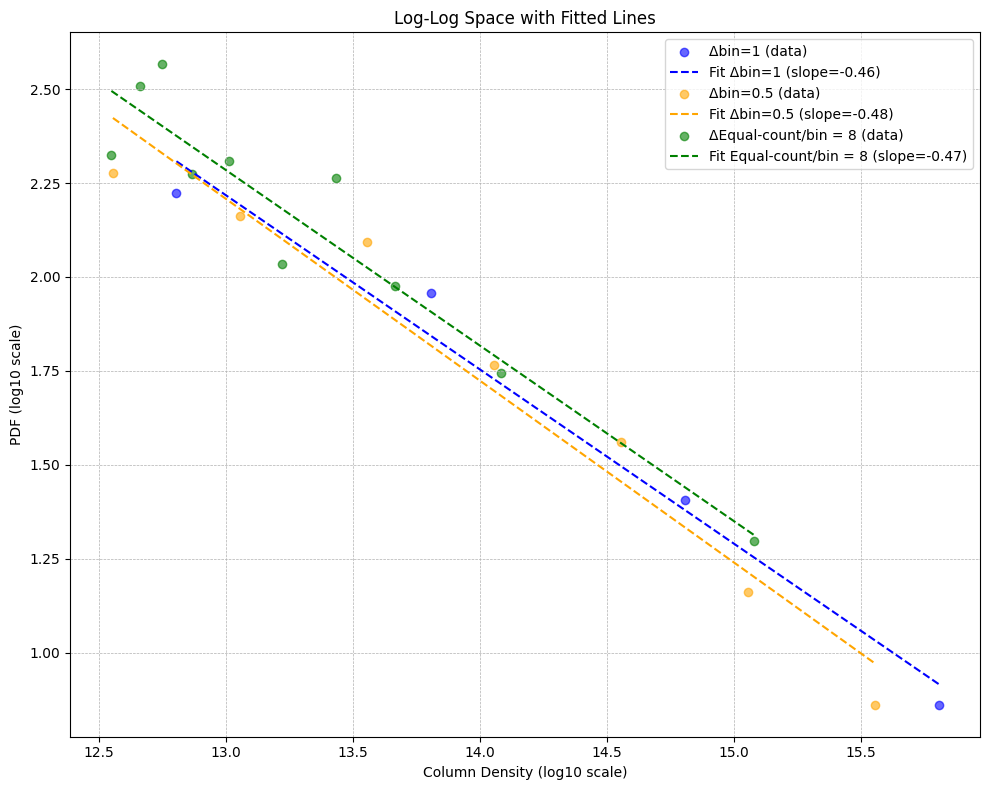

Fit for Δbin=1: Slope = -0.46, Intercept = 8.25
Fit for Δbin=0.5: Slope = -0.48, Intercept = 8.50
Fit for Equal-count/bin = 8: Slope = -0.47, Intercept = 8.36


In [35]:
# Fit a line to each distribtuion in log-log space
# e.g. use np.polyfit

# Fit a line to the Δbin = 1 distribution
slope_1, intercept_1 = np.polyfit(log_x_values_1, log_y_values_1, 1)  # Linear fit
fit_line_1 = slope_1 * log_x_values_1 + intercept_1  # Fitted line

# Fit a line to the Δbin = 0.5 distribution
slope_0_5, intercept_0_5 = np.polyfit(log_x_values_0_5, log_y_values_0_5, 1)  # Linear fit
fit_line_0_5 = slope_0_5 * log_x_values_0_5 + intercept_0_5  # Fitted line

# Fit a line to the ΔEqual-count/bin = 8 distribution
slope_8, intercept_8 = np.polyfit(log_x_values_8, log_y_values_8, 1)  # Linear fit
fit_line_8 = slope_8 * log_x_values_8 + intercept_8  # Fitted line

# Plot the data and fitted lines
plt.figure(figsize=(10, 8))
plt.title("Log-Log Space with Fitted Lines")

# Scatter plot for Δbin = 1
plt.scatter(log_x_values_1, log_y_values_1, color='blue', label="Δbin=1 (data)", alpha=0.6)
plt.plot(log_x_values_1, fit_line_1, color='blue', linestyle='--', label=f"Fit Δbin=1 (slope={slope_1:.2f})")

# Scatter plot for Δbin = 0.5
plt.scatter(log_x_values_0_5, log_y_values_0_5, color='orange', label="Δbin=0.5 (data)", alpha=0.6)
plt.plot(log_x_values_0_5, fit_line_0_5, color='orange', linestyle='--', label=f"Fit Δbin=0.5 (slope={slope_0_5:.2f})")

# Scatter plot for Equal-count/bin = 8
plt.scatter(log_x_values_8, log_y_values_8, color='green', label="ΔEqual-count/bin = 8 (data)", alpha=0.6)
plt.plot(log_x_values_8, fit_line_8, color='green', linestyle='--', label=f"Fit Equal-count/bin = 8 (slope={slope_8:.2f})")

plt.xlabel("Column Density (log10 scale)")
plt.ylabel("PDF (log10 scale)")


plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)


plt.tight_layout()
plt.show()


print(f"Fit for Δbin=1: Slope = {slope_1:.2f}, Intercept = {intercept_1:.2f}")
print(f"Fit for Δbin=0.5: Slope = {slope_0_5:.2f}, Intercept = {intercept_0_5:.2f}")
print(f"Fit for Equal-count/bin = 8: Slope = {slope_8:.2f}, Intercept = {intercept_8:.2f}")

## Task 6: Get the standard deviation error (std) for the slope and the intercept for each fitted line
Home Questions: 
- How does the fitting routine find the best fit? (See e.g. the least-square error calculation:  https://quantifyinghealth.com/residual-standard-deviation-error/)
- Vary the starting point of the histograms to see the effect on the error of the slope and the intercept

In [36]:
# e.g. use np.polyfit and return the covariance-matrix

# Fit a line to the Δbin = 1 distribution and return covariance matrix
fit_1, cov_1 = np.polyfit(log_x_values_1, log_y_values_1, 1, cov=True)

# Fit a line to the Δbin = 0.5 distribution and return covariance matrix
fit_0_5, cov_0_5 = np.polyfit(log_x_values_0_5, log_y_values_0_5, 1, cov=True)

# Fit a line to the Equal-count/bin = 8 distribution and return covariance matrix
fit_8, cov_8 = np.polyfit(log_x_values_8, log_y_values_8, 1, cov=True)

# Extract uncertainties from the covariance matrices
slope_uncertainty_1, intercept_uncertainty_1 = np.sqrt(np.diag(cov_1))
slope_uncertainty_0_5, intercept_uncertainty_0_5 = np.sqrt(np.diag(cov_0_5))
slope_uncertainty_8, intercept_uncertainty_8 = np.sqrt(np.diag(cov_8))

# Print the covariance matrices
print("Covariance Matrix for Δbin=1:")
print(cov_1)

print("\nCovariance Matrix for Δbin=0.5:")
print(cov_0_5)

print("\nCovariance Matrix for Equal-count/bin = 8:")
print(cov_8)

Covariance Matrix for Δbin=1:
[[ 0.00238996 -0.03418842]
 [-0.03418842  0.49205273]]

Covariance Matrix for Δbin=0.5:
[[ 0.00215526 -0.03029222]
 [-0.03029222  0.42791248]]

Covariance Matrix for Equal-count/bin = 8:
[[ 0.00281563 -0.03753651]
 [-0.03753651  0.50195591]]


In [41]:
# use e.g. np.diag on the cov-matrix ...etc. to calculate the std for the slope and the intercept

# Get standard deviations
std_devs_1 = np.sqrt(np.diag(cov_1))
std_devs_0_5= np.sqrt(np.diag(cov_0_5))
std_devs_8 = np.sqrt(np.diag(cov_8))

print(std_devs_1)  
print(std_devs_0_5)
print(std_devs_8)

[0.04888724 0.70146471]
[0.04642481 0.65415019]
[0.05306247 0.70848847]


<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> 
- Which parts of the covariance-matrix gives the covariance that correlates the errors between the slope and the intercept?
    
- What does a covariance=0 mean?
  
- What does a negative covariance value mean?
  
- Are the errors for the slope and the intercept correlated or independent from each other? What does this mean for an error propagation?
    https://en.wikipedia.org/wiki/Propagation_of_uncertainty
</div>


In [ ]:
#1 The off-diagonal entries (i.e., the (1,2) and (2,1) elements of the matrix)
#  give the covariance that correlates the errors between the slope and the intercept.
#2 Covariance = 0 between slope and intercept errors → Uncorrelated errors 
#  → No linear dependency in uncertainty propagation.
#3 If the estimated slope a ends up slightly larger than its true value, the intercept b tends to be smaller than its true value, and vice versa.
#  The errors in a and b are negatively correlated.
#4 They are typically correlated, except for covariance=0, they are independent.You must include covariance in the formula; 
#  ignoring it gives incorrect uncertainties.

- Are the values of the slope and the intercept in log10 or linear? -> To check that: Apply the log10 on the function $f(N) = A N^{\beta}$ (Equation 15) and separate the terms:
- Which variable defines the slope and the intercept? 

In [ ]:
# The slope is β in linear and the intercept is A in log scale.

<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>

## Task 7: The cosmic density for the neutral hydrogen: $\Omega_{HI}$
- Solve the integration in Equation 13 with Equation 15. Note: There is only one dependence on ***N*** ! (integration by hand, not Python library)
- Insert the integration limits $10^{12.5} cm^{-2} \leq N_{HI} \leq 10^{14} cm^{-2}$

*The reason: In this density range we only account for the clouds with neutral hydrogen. Most absorption systems with N >* $10^{14.5} cm^{-2}$ *also show metal absorption lines (triply ionized carbon and silicon, and some other common elements and ionization stages). Clouds with H I column densities larger than N >* $10^{17} cm^{-2}$ *start showing a discontinuity due to continuous absorption at a rest frame wavelength 912 Å, beyond the limit of the Lyman series. These ‘Lyman limit systems’ occupy a column density regime where a gas cloud ***starts shielding itself against ionizing radiation*** from the outside.*



For the redshift z:
- Assume that the synthetic/simulated data corresponds to a quasar with redshift similar to Figure 4! (z calculated last week)
- To make the calculation for the cosmic density comparable to last week: Take the redshift bin in which our quasar's redshift falls (Gunn-Peterson Task)!

In [48]:
# Calcuclate ΩHI for one redshift bin
# We use the redshift bin of z = 3.0 from previous afternoon for the calculation

ΩHI = 4.534 * 10e-20

## Task 8: The cosmic density for the ionized hydrogen: $\Omega_{HII}$
- Use the ratio for $\frac{n_{HII}}{n_{HI}}$ that you calculated last time from the Gunn-Peterson effect.

In [50]:
# Calcuclate ΩHII for one redshift bin
ratio = np.array([307692.07064581616])
ΩHII = ratio * ΩHI
ΩHII

array([1.39507585e-13])

## Task 9: Comparisons of the calculations for the cosmic density

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> 
    
- Compare the values for $\Omega_{HI}$ and $\Omega_{HII}$ with the values obtained from the Gunn-Peterson effect!
    
- Is the calculation for $\Omega_{HII}$ determined by the calculations from the Lyα-forest alone?
 
- Do we find more neutral or more ionized hydrogen?
</div>



In [ ]:
comp = ΩHII / ΩHI
comp



<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>

## Task 10: Temperature of the Lyα-absorbers
- Convert the values for the Doppler broadening into the temperature with Equation 11.
- Calculate the mean and the standard deviation of the temperature.

<div class="alert alert-block alert-info">
<b>Blue-Box-Task:</b> 

- Is the typical ***temperature and density*** of the absorbers (WHIM =WarmHotIntergalacticMedium) consistent with the other findings? See e.g. https://en.wikipedia.org/wiki/Warm–hot_intergalactic_medium (and for comparison to the ISM: https://en.wikipedia.org/wiki/Interstellar_medium )

- What is the origin of the Doppler broadening parameter?
</div>

<div class="alert alert-block alert-warning">
<b>Info:</b> Compare and discuss with your supervisor!
</div>